In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

In [4]:
#import data 
from tensorflow.keras.datasets import cifar10

In [6]:
(X_train,y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [8]:
#check image
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

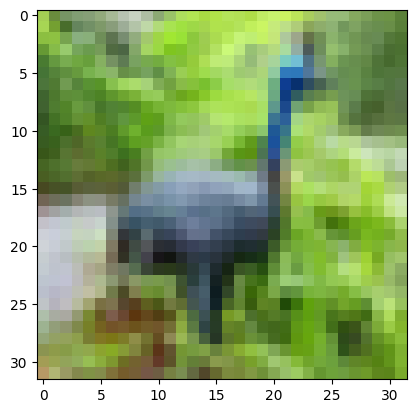

In [12]:
#view image
plt.imshow(X_train[6])

In [15]:
X_train = X_train.reshape(50000, 32, 32, 3)

In [16]:
X_test = X_test.reshape(10000, 32, 32, 3)

In [17]:
X_train.max(), X_train.min()

(255, 0)

In [18]:
#scaling
X_train = X_train/255

In [19]:
X_test = X_test/255

In [20]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [21]:
#label
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [22]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
y_train_cat = tf.keras.utils.to_categorical(y_train)

In [24]:
y_train[0]

array([6], dtype=uint8)

In [26]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
# CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten

In [60]:
model = Sequential()

In [61]:
#CNN
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())


In [62]:
#ANN
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [63]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_7 (Dense)             (None, 64)                921664    
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [83]:
model.fit(X_train, y_train_cat, epochs=8, steps_per_epoch=500, verbose=1)

Epoch 1/8
500/500 [==============================] - 58s 116ms/step - loss: 0.5914 - accuracy: 0.7955
Epoch 2/8
500/500 [==============================] - 60s 121ms/step - loss: 0.5643 - accuracy: 0.8046
Epoch 3/8
500/500 [==============================] - 59s 117ms/step - loss: 0.5467 - accuracy: 0.8110
Epoch 4/8
500/500 [==============================] - 61s 122ms/step - loss: 0.5306 - accuracy: 0.8135
Epoch 5/8
500/500 [==============================] - 59s 118ms/step - loss: 0.5077 - accuracy: 0.8235
Epoch 6/8
500/500 [==============================] - 60s 120ms/step - loss: 0.4848 - accuracy: 0.8332
Epoch 7/8
500/500 [==============================] - 59s 117ms/step - loss: 0.4708 - accuracy: 0.8380
Epoch 8/8
500/500 [==============================] - 62s 123ms/step - loss: 0.4385 - accuracy: 0.8475


In [84]:
y_pred = model.predict(X_test)

313/313 [==============================] - 4s 11ms/step


In [85]:
y_pred_cat = np.argmax(y_pred, axis=1)

In [86]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1000
           1       0.78      0.72      0.75      1000
           2       0.54      0.49      0.51      1000
           3       0.48      0.45      0.47      1000
           4       0.62      0.57      0.59      1000
           5       0.51      0.57      0.54      1000
           6       0.71      0.73      0.72      1000
           7       0.70      0.69      0.69      1000
           8       0.69      0.81      0.74      1000
           9       0.72      0.72      0.72      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



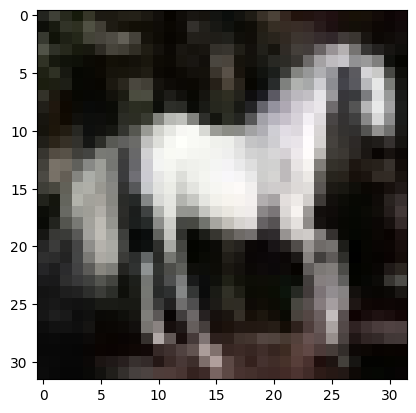

In [102]:
#check visually
plt.imshow(X_test[13])

In [89]:
# 0	airplane
# 1	automobile
# 2	bird
# 3	cat
# 4	deer
# 5	dog
# 6	frog
# 7	horse
# 8	ship
# 9	truck

In [103]:
y_pred_cat[13]

7